## Problem: Longest Consecutive Sequence

Given an array of integers nums, return the length of the longest consecutive sequence of elements.

A consecutive sequence is a sequence of elements in which each element is exactly 1 greater than the previous element.

You must write an algorithm that runs in O(n) time.

In [1]:
from typing import List

#my sol, need to deal with alot of edge cases
def longestConsecutive(nums) -> int:
    #this step is not O(n) oops, this is O(nlogn)
    all=sorted(set(nums))
    
    print(all)
    maxlen=1
    L=0
    for R in range(1,len(all)):
        if all[R]!=all[R-1]+1:
            print(all[L],all[R])
            maxlen=max(maxlen,R-L)
            #get the prev longest list
            L=R
        if R==len(all)-1:
            maxlen=max(maxlen,R-L+1)
    return maxlen if all else 0

In [2]:
#neetcode, quite smart lol
def longestConsecutive( nums: List[int]) -> int:
    numSet = set(nums)
    longest = 0

    for n in numSet:
        #this for + if loop iterates over /finds all the START of sequences
        if (n - 1) not in numSet:
            length = 1
            while (n + length) in numSet:
                length += 1
            #this loop basically updates longest sequence!
            longest = max(length, longest)
    return longest


## Problem: Greatest Common Divisor in strings

For two strings s and t, we say "t divides s" if and only if s = t + t + t + ... + t + t (i.e., t is concatenated with itself one or more times).

Given two strings str1 and str2, return the largest string x such that x divides both str1 and str2.

Example 1:

Input: str1 = "ABCABC", str2 = "ABC"
Output: "ABC"
Example 2:

Input: str1 = "ABABAB", str2 = "ABAB"
Output: "AB"
Example 3:

Input: str1 = "LEET", str2 = "CODE"
Output: ""

In [ ]:
#mysol
class Solution:
    def gcdOfStrings(self, str1: str, str2: str) -> str:
        #note that from observation the first unit must contain the index 0. cannot start partially
        
        def check(s,t):
            #lengths match
            if len(s)%len(t)==0:
                #integer division
                if s==t*(len(s)//len(t)):
                    return True
            return False
        #assume this substring ends at index 0
        largest=0
        
        #iterate over the smaller string, checking all possible substrings from the start
        #start from the first index which is 1 because it is ending
        for i in range(1,min(len(str1),len(str2))+1):
            print(str1[:i],str2[:i])
            #must be the same, otherwise end up like 'LEET' 'CODE'
            if str1[:i]==str2[:i]:
                if check(str1,str1[:i]) and check(str2,str2[:i]):
                    if i>largest:
                        largest=i
        
        return str1[:largest]


In [ ]:
#theirsol
from math import gcd
class Solution:
    def gcdOfStrings(self, str1: str, str2: str) -> str:
        #must be composed of repeating subunits
        if(str1+str2!=str2+str1):
            return ""
        #holy shit
        return str1[:gcd(len(str1),len(str2))]
        

# Max Average Subarray

You are given an integer array nums consisting of n elements, and an integer k.

Find a contiguous subarray whose **length is equal to k** that has the maximum average value and return this value. Any answer with a calculation error less than 10-5 will be accepted.

```
Example 1:

Input: nums = [1,12,-5,-6,50,3], k = 4
Output: 12.75000
Explanation: Maximum average is (12 - 5 - 6 + 50) / 4 = 51 / 4 = 12.75
Example 2:

Input: nums = [5], k = 1
Output: 5.00000
```

This solution beats 63% of people. Pretty decent!

In [15]:
import math
def findMaxAverage(nums, k) -> float:
    if len(nums)==1:
        return nums[0]
    

    cur_sum=sum(nums[0:k])/k
    cur_max=cur_sum

    for start in range(1,len(nums)-k+1):
        print("start",start,"cursum before update",cur_sum)
        cur_sum+=nums[start+k-1]/k
        cur_sum-=nums[start-1]/k
        print("start",start,"cursum after update",cur_sum)
        if cur_sum>cur_max:
            cur_max=cur_sum
    
    return cur_max

In [16]:
print(findMaxAverage([0,1,1,3,3],4))

start 1 cursum before update 1.25
start 1 cursum after update 2.0
2.0


## Can Place Flowers

You have a long flowerbed in which some of the plots are planted, and some are not. However, flowers cannot be planted in *adjacent plots*.

Given an integer array flowerbed containing `0`'s and `1`'s, where `0` means empty and `1` means not empty, and an integer `n`, return `true` if `n` new flowers can be planted in the flowerbed without violating the no-adjacent-flowers rule and `false` otherwise.

In [ ]:
#my shitty solutions with a ton of edge cases
class Solution:
    def canPlaceFlowers(self, flowerbed: List[int], n: int) -> bool:
        #check if n is zero
        if n==0:
            return True
            
        remain=n
        #empty list
        if len(flowerbed)==0:
            return False
        #one spot only
        elif len(flowerbed)==1:
            return flowerbed[0]==0 and n==1

        #check the first elem:
        if flowerbed[0]==0 and flowerbed[1]==0:
            flowerbed[0]=1
            remain-=1
            
        #check the last elem
        if flowerbed[-1]==0 and flowerbed[-2]==0:
            flowerbed[-1]=1
            remain-=1

        #ignore the first and last elem
        for spot in range(1,len(flowerbed)-1):
            if flowerbed[spot-1:spot+2]==[0,0,0]:
                flowerbed[spot]=1
                remain-=1
        
        if remain>0:
            return False
        else:
            return True

In [ ]:
#theri solution, abit like linked lists but add in dummy nodes at the edges
class Solution:
    def canPlaceFlowers(self, flowerbed: List[int], n: int) -> bool:
        #head
        flowerbed.insert(0,0)
        #tail
        flowerbed.append(0)
        #ignore last 2 elems
        for i in range(1,len(flowerbed)-1):
            if flowerbed[i-1] == flowerbed[i+1] == flowerbed[i] == 0:
                #use a unique identifier like 2, can be 3 or anything
                flowerbed[i] = 2
        flow = flowerbed.count(2)
        return flow>=n

## Merge Intervals

Given an array of `intervals` where `intervals[i] = [starti, endi]`, merge all overlapping intervals, and return an array of the non-overlapping intervals that cover all the intervals in the input.

 
```
Example 1:

Input: intervals = [[1,3],[2,6],[8,10],[15,18]]
Output: [[1,6],[8,10],[15,18]]
Explanation: Since intervals [1,3] and [2,6] overlap, merge them into [1,6].
Example 2:

Input: intervals = [[1,4],[4,5]]
Output: [[1,5]]
Explanation: Intervals [1,4] and [4,5] are considered overlapping.
```

In [ ]:

class Solution:
  def merge(self, intervals: List[List[int]]) -> List[List[int]]:
    # Handle edge cases - empty list or single interval
    if not intervals:
        return []
    if len(intervals) == 1:
        return intervals
    
    # Sort intervals by start time
    intervals.sort(key=lambda x: x[0])
    out = []
    
    # Initialize with first interval
    # represents the current merge group
    current = intervals[0]
    
    # Iterate through remaining intervals
    for interval in intervals[1:]:
        # If current interval overlaps with next interval
        if current[1] >= interval[0]:
            # Merge by updating end time
            current[1] = max(current[1], interval[1])
        else:
            # No overlap, add current to output and start new current
            out.append(current)
            current = interval
    
    # Don't forget to add the last merged interval
    out.append(current)
    
    return out
        


## Find Minimum Inefficienty

Amazon Web Service has n servers, each of them either has high fault tolerance or high reliability. A system works better if all the servers have the same attributes. The inefficiency of a group of server is defined as the number of adjacent pairs of server that have different attributes.

Consider, for example, a set of servers described as `1001001` where `'0'` means the server has high fault tolerance, `'1'` means the server has high reliabiity. The inefficiency of this group is `4` as described in the image below:

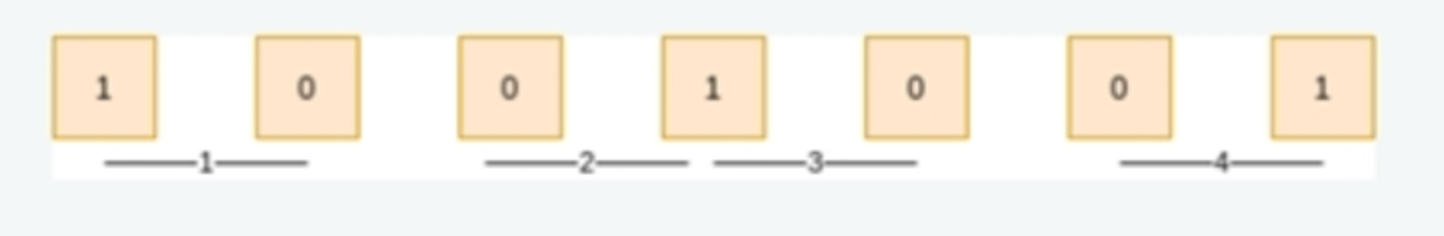

Given a string serverType of length n consisting of '0', '1', and '?', where '0' means the server has high fault tolerance, '1' means the server has high reliability, and '?' means you can install any type of server there, find the minimum inefficiency you can get after install a server at each '?'.

```
Example 1:

Input:  serverType = "??011??0"
Output: 2 
Explanation:

In the above example, the number of servers n = 8. One optimal way to install servers is to 
      
1. Install a server having fault tolerance (0) at the first and the second positions.
  
2. Install a server having high reliability (1) at the sixth and the seventh positions.
  
After making these changes, the server types are '00011110'. The number of adjacent pairs having different server types is 2. It can be shown that the answer cannot be reduced from 2. Return 2.

Note that another possible way to achieve a minimum number of different adjancet pairs as 2 would 00011100 and 00011000.
      
Example 2:

Input:  serverType = "00?10??1?"
Output: 3 
Explanation:

One optimal way to install server is to install high-reliability servers. The new
server types are "0011011111" with 3 adjacent dissimilar pairs.
```

In [ ]:
def findMinimumInefficiency(serverType: str) -> int:
    #first consider if ? appears at first and last position
    if serverType[0]=="?":
        i=1
        while serverType[i]=="?":
            i+=1
        #fill up all the first few values with "?"
        fill=serverType[i]
        serverType=fill*i + serverType[i:]
        
    if serverType[-1]=="?":
        i=-1
        while serverType[i]=="?":
            i-=1
        #fill up all the last few values with "?"
        fill=serverType[i]
        serverType= serverType[:i]+ fill*(-i)

    # Fill middle sequences
    i=1
    while i< len(serverType):
        if serverType[i] == '?':
            # Get left and right non-'?' index
            left = i-1
            right = serverType.index("?",i+1)
            
            # If same, fill with that value
            if left == right:
                serverType[] = left
            else:
                # Put transition in middle of sequence
                servers[i] = left
        else:
            i+=1
    
    def count(string):
        i=1
        count=0
        while i<len(string):
            if string[i]!=string[i-1]:
                count+=1
            i+=1
        return count
    
    print(serverType)
    return count(serverType)

print(findMinimumInefficiency("??010???"))


00010000
2
